# Short Assignment 4

This is an individual assignment. 

**Due: Thursday, March 3 @ 11:59PM**

# Problem 1

**Solve this problem on paper.**

Suppose you have the following training data set:

$$X=\{(1,1,2),(10,3,0),(-5,-4,1),(2,-3,1),(10,10,20),(0,0,0)\}$$

with training labels

$$y=\{-1,1,1,-1,-1,1\}$$

where $y_i=1$ indicates a true target and $y_i=-1$ indicates a non-target data point. Suppose you trained a $k$-NN classifier to produce a confidence of target given a sample. For the above data points, your $k$-NN produced the following confidence values:

$$c=\{0.7,0.6,0.2,0.3,0,0.9\}$$

Answer the following questions:

1. Draw the associated ROC curve.

2. To make a final decision, suppose your threshold is $c=0.5$ (confidence value), where samples with confidence values $\leq 0.5$ are marked as non-target and samples with confidence values $>0.5$ are marked as target. What would be your resulting confusion matrix, FPR and TPR?

# Problem 2

The starter code below is an incomplete implementation of the EM algorithm to optimize a Gaussian Mixture Model data likelihood.

In this problem, you will complete the provided code by filling in the empty slots (do not use any library or online implementations).

In [11]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''a=np.array([[2,3],[2,1],[2,2],[3,1]])
b=np.array([1, 2,3,2])
b=np.reshape(b,[4,1])
print(a,b,a.shape, b.shape)
c=a*b
print(c)
print(c.sum(axis=0))'''

'a=np.array([[2,3],[2,1],[2,2],[3,1]])\nb=np.array([1, 2,3,2])\nb=np.reshape(b,[4,1])\nprint(a,b,a.shape, b.shape)\nc=a*b\nprint(c)\nprint(c.sum(axis=0))'

In [4]:
def EM_GaussianMixture(X, NumComponents, MaximumNumberOfIterations=100, DiffThresh=1e-4):
    '''This function implements the EM algorithm for a Gaussian Mixture Model'''
    
    # Size of the input data: N number of points, D features
    N, D = X.shape
    
    # Initialize Parameters of each Component K
    Means = np.zeros((NumComponents,D))
    Sigs = np.zeros(((D, D, NumComponents)))
    Ps = np.zeros(NumComponents)
    for i in range(NumComponents):
        rVal = np.random.uniform(0,1)
        Means[i,:] = X[max(1,round(N*rVal)),:]
        Sigs[:,:,i] = 1*np.eye(D)
        Ps[i] = 1/NumComponents
        
    # E-Step Solve for p(z | x, Theta(t)) = Cik
    pZ_X = np.zeros((N,NumComponents))
    for k in range(NumComponents):
        # Assign each point to a (multivariate) Gaussian component with probability pi(k)
        denomuinator=0
        for k1 in range(NumComponents):
            denomuinator+= multivariate_normal(Means[k1,:],Sigs[:,:,k1]).pdf(X)*Ps[k1]
        pZ_X[:,k] = multivariate_normal(Means[k,:],Sigs[:,:,k]).pdf(X)*Ps[k]/denomuinator
    
    Diff = np.inf
    NumberIterations = 1
    while Diff > DiffThresh and NumberIterations < MaximumNumberOfIterations:
        ## M-step: Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumComponents):
            ## Complete M-step: Update parameters
            #Means
            pZ=np.reshape(pZ_X[:,k],[N,1])
            #print(X.shape, pZ_X[:,k].shape,pZ.shape,sum(pZ_X[:,k]).shape,sum(pZ_X[:,k]),Means[k,:].shape)
            #Numerator_mean=X*pZ
            #Numerator_mean=Numerator_mean.sum(axis=0)
            #Means[k,:] = Numerator_mean/sum(pZ_X[:,k])# complete this line
            Means[k,:] = (X*pZ).sum(axis=0)/sum(pZ_X[:,k])
            #Sigs
            xDiff = X-MeansOld[k,:]            
            J = np.zeros((D,D))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:], xDiff[i,:])
            Sigs[:,:,k] = J / sum(pZ_X[:,k])
            
            #Ps
            Ps[k] = sum(pZ_X[:,k])/NumComponents# complete this line
            
        ## E-step: Solve for p(z | x, Theta(t))
        # Complete E-step
        for k in range(NumComponents):
            # Assign each point to a Gaussian component with probability pi(k)
            denomuinator=0
            for k1 in range(NumComponents):
                denomuinator+= multivariate_normal(Means[k1,:],Sigs[:,:,k1]).pdf(X)*Ps[k1]
            pZ_X[:,k] = multivariate_normal(Means[k,:],Sigs[:,:,k]).pdf(X)*Ps[k]/denomuinator # complete this line
        
        Diff = sum(sum(abs(MeansOld - Means))) + sum(sum(sum(abs(SigsOld - Sigs)))) + sum(abs(PsOld - Ps))
        print('t = ',NumberIterations,': \t', Diff)
        NumberIterations = NumberIterations + 1
    return Means, Sigs, Ps, pZ_X

# Problem 3

Using your code in problem 3, determine the mixture proportion, mean and (diagonal) covariance associated with each of the mixture component in the data contained in mixture.txt.

In your solution include:

* a plot where each data point is color-coded by their weight responsabilities (you have been provided with the plotting script).

* a plot where each data point is color-coded by their cluster membership.

Answer the following questions:

1. How many mixture components are found in the data?

2. How did you determine this?

3. What did you estimate for the mixture components, means and covariances associated with each mixture component?

t =  1 : 	 3338.8449564873413
t =  2 : 	 120.41247709984349
t =  3 : 	 226.8024582456496
t =  4 : 	 307.14578835227906
t =  5 : 	 238.34017149696362
t =  6 : 	 151.3051510656427
t =  7 : 	 90.30699437052726
t =  8 : 	 53.12050694299547
t =  9 : 	 39.62426046288396
t =  10 : 	 32.329104244671434
t =  11 : 	 35.21947006288117
t =  12 : 	 59.699060890885114
t =  13 : 	 96.46978267825216
t =  14 : 	 124.81162914043078
t =  15 : 	 83.03818982468727
t =  16 : 	 20.226125676374547
t =  17 : 	 25.1125092332263
t =  18 : 	 29.486656332205907
t =  19 : 	 34.00278719038399
t =  20 : 	 37.694254256461875
t =  21 : 	 39.79849545031151
t =  22 : 	 39.244214326346786
t =  23 : 	 34.88147122321255
t =  24 : 	 26.82975110599215
t =  25 : 	 15.880825491163439
t =  26 : 	 6.918546228600627
t =  27 : 	 2.945303896082682
t =  28 : 	 1.3601590197789477
t =  29 : 	 0.664278992771243
t =  30 : 	 0.3419030998677779
t =  31 : 	 0.18119300484293194
t =  32 : 	 0.09735035868063029
t =  33 : 	 0.052626717468837965

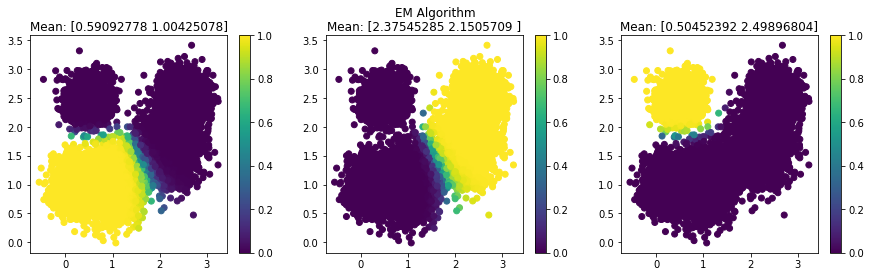

In [5]:
## Load Data
X = np.loadtxt('mixture.txt')
NumComponents=3
## Set number of components
EM_Means, EM_Sigs, EM_Ps, pZ_X = EM_GaussianMixture(X, NumComponents)

## Plotting Routine
fig = plt.figure(figsize=(15, 4))
plt.suptitle('EM Algorithm')
for i in range(NumComponents):
    ax = fig.add_subplot(1,NumComponents,i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=pZ_X[:,i]) 
    ax.set_title('Mean: '+ str(EM_Means[i,:]))
    fig.colorbar(p1, ax=ax);

In [47]:
print(pZ_X.shape,EM_Means.shape, EM_Ps.shape,EM_Sigs.shape)
print(EM_Means,EM_Sigs)
'''
class1=class2=class3=np.zeros([1,2])
print(class1.shape,np.reshape(X[i,:],[1,2]).shape)'''

(10000, 3) (3, 2) (3,) (2, 2, 3)
[[0.59092778 1.00425078]
 [2.37545285 2.1505709 ]
 [0.50452392 2.49896804]] [[[ 2.17117418e-01  9.01513902e-02  6.07930004e-02]
  [ 3.80375542e-03  5.38766897e-02 -1.40729798e-04]]

 [[ 3.80375542e-03  5.38766897e-02 -1.40729798e-04]
  [ 7.32582186e-02  2.30906690e-01  5.02636616e-02]]]


'\nclass1=class2=class3=np.zeros([1,2])\nprint(class1.shape,np.reshape(X[i,:],[1,2]).shape)'

In [38]:
#定义每个点
# EM_Means, EM_Sigs, EM_Ps, pZ_X = EM_GaussianMixture(X, NumComponents)
N, D = X.shape
N_probablity=np.zeros((N,3))
for i in range (N):
    for j in range(NumComponents):
        N_probablity[i,j]=multivariate_normal(EM_Means[j,:],EM_Sigs[:,:,j]).pdf(X[i,:])
#print(N_probablity)    
N_cluster=np.argmax(N_probablity,axis=1)
print(N_cluster.shape)
class1=class2=class3=np.zeros([1,2])
for i in range(N):
    if N_cluster[i]==0:
        class1=np.vstack((class1,np.reshape(X[i,:],[1,2])))
    if N_cluster[i]==1:
        class2=np.vstack((class2,np.reshape(X[i,:],[1,2])))
    if N_cluster[i]==2:
        class3=np.vstack((class3,np.reshape(X[i,:],[1,2])))
class1=class1[1:,:]
class2=class2[1:,:]
class3=class3[1:,:]
print(class3.shape,class1.shape, class2.shape)

(10000,)
(1076, 2) (4407, 2) (4517, 2)


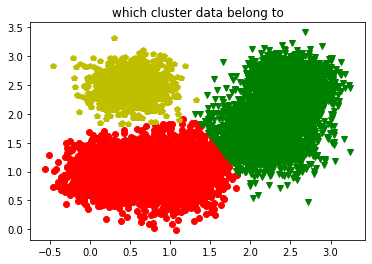

In [45]:
# Look at the decision boundary decide Class 1
plt.figure
plt.title("which cluster data belong to")
plt.plot(class1[:,0],class1[:,1],'ro')
plt.plot(class2[:,0],class2[:,1],'gv')
plt.plot(class3[:,0],class3[:,1],'yp')
plt.show()

## questions
1. How many mixture components are found in the data?
3
2. How did you determine this?
observation
3. What did you estimate for the mixture components, means and covariances associated with each mixture component?
means:
[[0.59092778 1.00425078]
 [2.37545285 2.1505709 ]
 [0.50452392 2.49896804]] 
covariances
[[[ 2.17117418e-01  9.01513902e-02  6.07930004e-02]
  [ 3.80375542e-03  5.38766897e-02 -1.40729798e-04]]

 [[ 3.80375542e-03  5.38766897e-02 -1.40729798e-04]
  [ 7.32582186e-02  2.30906690e-01  5.02636616e-02]]]

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.